Write your project by adding new cells **below** the line, using the <kbd>+</kbd> button in the toolbar at the top.

---

# Reading and Writing Files with Python

A tutorial on how to read and write files with Python.

## Motivation

Learning how to read data from a file into your Python code is essential for efficient and effective research. Often, you will be working with huge data sets, and it would be very tedious to have to manually type these data sets into huge vectors. Instead, it is very likely that these data sets will be stored in a file of some type, so we will be learning how to automatically load this data into Python objects.

Conversely, up to now, we have just been printing out the results of our Python scripts to the terminal. The problem with this is that these results then are **not** saved when we run code through the command line. So if we want to see the results of the same script, we would have to run the entire Python script again - which could take hours (or days in some cases!). Instead, we would like to learn how to write any results that we obtain throughout our script to a file, so that we can save it. In fact, we can then read these files back into the code if we want to make any further modifications to our results!

There is a module in Python called [h5py](https://docs.h5py.org/en/stable/), which is a Python wrapper for the [HDF5](https://www.hdfgroup.org) binary data format. We will see how using the hierarchial data format of a HDF5 data file is a great way to store huge amounts of data in a very organised way, with very fast reading and writing speeds. 

## Overview

1. Built-in Python methods for reading from a text file in Python. 
2. Built-in Python methods for writing to a text file in Python.
3. Finally, we will see how to use the h5py module in Python to read and write numerical data into a heirarchial data format. This will be the most useful part of the tutorial for research with mathematical computing as researchers mostly work with numerical data. 

## Reading a Text File with Python

For full details on reading in a text file with Python, please check the [documentation](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files).

### Opening a File

Before we can do anything with the file, we must always first open the file. There are 4 basic modes in which you can open a file using Python:

1. 'r': Read Only - We can only read in data from the file. 
2. 'w': Write Only - We can only write data to the file. If another data file exists with the same name, it will be overwritten.
3. 'a': Append - We can write to the end of a file that already exists, and the file will not be overwritten.
4. 'r+': Read and Write - We can read and write to the file.

The syntax for opening a file is the following:

`f = open('fileName', 'mode')`

where we just replace `fileName` with the name of the file, and `mode` with one of the 4 modes of opening the file from the list above. 

### Reading from a File

Once we have the file opened to the variable `f`, we can read in the file using a few different methods. We can read in the whole file using the first method below, but it is also very easy to read in a select few characters or just one line. Then, we should think of a cursor moving along the file as it is being read. For example, if we read in 2 characters, and then in the next line of Python we read in 2 characters again, this time we will have read in the 3rd and 4th characters. This might seem obvious but it is an important point to bear in mind.

1. `f.read()`

This will read in the whole file. We can also give this method an integer number, `.read(size)`, which will cause the method to read in `size` characters. 

2. `f.readline()`

This will read one full line.

3. `f.readlines()`

This will read in all the lines in the text file.

4. `for line in f:`

This will iteratively read in all the lines in the text file, so that we can loop over each `line` variable. This is quite a handy way to read in the file if we are repeatedly performing the same action on every line of the text file. 

### Closing a File

After we are finished using a file, we should always close it! This is good coding practice as otherwise you might end up writing data to the incorrect data file. This would undoubtedly cause some serious headaches! The syntax for closing a file is relatively straightforward, where `f` is the file we have open:

`f.close()`

Let's read in the file 'ReadEx.txt' below. First, we will show the basic functionality of reading in the full file.

In [1]:
#Reading in the full file

#opening the file in read only mode
f = open('ReadEx.txt', 'r')

#printing what we read from the file
data = f.read()
print(data)

#closing the file when we are finished with it
f.close()

The quick brown fox jumps over the lazy dog.
A sentence which doesn't have all the letters of the alphabet.


In [2]:
#Reading in the file line by line

#opening the file in read only mode
f = open('ReadEx.txt', 'r')

#printing every second character from each line
for line in f:
    print(line[::2])
    
#closing the file when we are finished with it
f.close()

Teqikbonfxjmsoe h aydg

Asnec hc os' aealtelteso h lhbt


🚩 ***Exercise:*** Read in the second line of the ReadEx.txt file and encrypt it however you like. One easy way is to send all the letters to the following letter in the alphabet. Then print this encrypted sentence to the command line.

## Writing to a Text File with Python

Firstly, remember that to write to a file using Python, we need to open the file in either one of these modes: `'w'`, `'a'` or `r+`. This depends on whether we need to read from the file also, and whether we want to overwrite the file or not. For the purposes of this first demonstration, we will use `'w'` as we want to start with a clean file each time.

Once the file, `f`, is opened, we can use the `f.write(s)` method to write the string s to the open file. 

This is pretty much the only method we need to write to the file, but refer to the [documentation](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files) for methods on how to move the "cursor" in the file, i.e. the file object’s position. You will need this to complete the following exercise. 

In [4]:
#Writing to a file 

#Opening the file in append mode
f = open('WriteEx.txt', 'w')

#Write a string to the file
f.write('Here is a file for you to write whatever you want into!\nI will start you off!')

#always remember to close the file when finished with it
f.close()

#Let's see what is in the file
f = open('WriteEx.txt', 'r')
print(f.read())
f.close()

Here is a file for you to write whatever you want into!
I will start you off!


🚩 ***Exercise:*** Write some Python code in the cell below to insert a line between the two lines in the file saying whatever you want. It might be helpful to try to think of a way of counting how many characters are in the first line, using the methods in the [documentation](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files). 

In [ ]:
#Inserting a line between the two lines already in 'WriteEx.txt'



## h5py

This section of the tutorial is to become fluent with the [h5py](https://docs.h5py.org/en/stable/) module, as it will be incredibly useful in mathematical computing research. Up to now, we have purely been concerned with text files, which can be useful. However, let us now exploit the functionality of h5py to read and write some numerical datasets. The h5py module is a wrapper for the HDF5 binary data format. 

Before we go into any code or syntax, let's first get a picture for what this hierarchial data format looks like. This will let us create our HDF5 files in ways that fully exploit this data format. 
![Image Of HDF5 structure](hdf5_structure.jpg)
From the above [image](#imageref) of the data format, we see we can collect data sets into groups. There are two basic kinds of objects in a HDF5 file: 

1. Datasets: Array-like collections of data.
2. Groups: Folder-like containers that hold datasets and other groups.

As you can see, we can nest groups within other groups. Finally, we can also give each object some meta data, which is also called an attribute. These attributes can be very handy. For example, you might set them equal to a simulation parameter for each data set so you can keep track of which simulation each data set corresponds to. 

According to the h5py documentation, it is crucial to keep in mind that **groups work like dictionaries, and datasets work like NumPy arrays**.

Now that we have an idea of what this hierarchial data structure looks like, we can start to look at the code needed to create these objects. 

## Creating a HDF5 File

The easiest way to create a HDF5 file using h5py is simply to exploit the fact that when we open a file in `'w'` or write mode, it overwrites any existing file and creates a new file. 

Let's create a HDF5 file in the next code section. We will then populate it with groups and data sets. The h5py.File is the root group of the file. The same syntax applies from opening a text file from before, and we can use the same modes as before to open the file:

`f = h5py.File("fileName.hdf5", "mode")`

Just like when we opened a text file before, we have to store the File object in a variable, `f`.

In [9]:
import h5py

#Creating the File object
f = h5py.File("test.hdf5", "w")

### Creating Groups

Let's now create our first group. The File object has a method for creating a group within it. The syntax is quite intuitive:

`grp = f.create_group("nameOfGroup")`

Again, we have to assign the group to a variable, `grp`.

In [10]:
#Creating a group in the File object
grp = f.create_group("Group1")

### Creating Data Sets

Now let's create a data set in our group! The syntax should somewhat similar to how we created the group, but now we just need to feed in more information like the shape and type of the data set:

`data = grp.create_dataset("name", <Tuple giving shape of array>, dtype=<Type of data>, data=<data you want to write>)`

Note that we are running the method on the group, `grp`, that we just created. We could have created the data set directly in the File object by using the same code, but changing the object to the File object, `f`. It is good coding practice to create your data sets this way as you can specify the size, shape and type of the array. Thus, when you go to load the data into your data set, any discrepancies will be flagged. However, it is also possible to load the data without specifying these details. 

In [11]:
import numpy as np

#Data that we want to load into our HDF5 File
results = np.array([0,1,2,3,4,5,6,7,8,9])

#Creating a data set in the group - Method 1
data1 = grp.create_dataset("method1", (10,), dtype=int, data=results)

#Creating a data set outside the group, in the main File object - Method 2
data2 = f.create_dataset("method2", data=results*2)

### Setting Attributes

Now that we have some data sets, we can add some meta data to them with the attributes proxy object, `attrs`:

`data.attrs["AttributeName"] = <Attribute Value>`

Here we are creating an attribute on the `data` variable, which corresponds to some data set. Similarly to above, we can also create an attribute on a group object by changing this variable, e.g. `grp.attrs["AttributeName"] = <Attribute Value>`.

In [12]:
#setting an attribute to the first data set we created
data1.attrs['Good practice?'] = 'Good'

#setting an attribute to the second data set we created
data2.attrs['Good practice?'] = 'Bad'

f.close()

## Reading a HDF5 File with h5py

Let's now learn how to read a HDF5 file. We will open the `test.hdf5` file that we just made and see how we can get all of the data that we just loaded into it.

As always, we need to open the file, but now in the read only mode. To determine what the first layer of the hierarchial structure looks like, we can run the `.keys()` method, just like a Python dictionary.

In [13]:
#Reading the File object
f = h5py.File("test.hdf5", "r")

print(list(f.keys()))

['Group1', 'method2']


We can see both the group and the root level data set that we created previously. It then becomes a matter of setting variables equal to the data set or the group using a dictionary-style syntax. We will now load and print both of the data sets that we created previously.

In [14]:
#Loading the data set that we put in the group
grp = f['Group1']
print(list(grp.keys()))
data1 = grp['method1']

#We can also skip the interim step of loading the group, by using path directories
data1again = f['Group1/method1']

#Loading the data set at the root level
data2 = f['method2']

print(data1[:], data1.attrs['Good practice?'])
print(data1again[:], data1again.attrs['Good practice?'])
print(data2[:], data2.attrs['Good practice?'])

f.close()

['method1']
[0 1 2 3 4 5 6 7 8 9] Good
[0 1 2 3 4 5 6 7 8 9] Good
[ 0  2  4  6  8 10 12 14 16 18] Bad


# 🚩 ***Practice Problem***

Here we will apply what we learned about the h5py module to a computational mathematical model. We will run a simulation and collect our results into a HDF5 file. 

We will be solving a simple ODE using 3 different methods - the Simple Euler Method, the Improved Euler Method and the Runge-Kutta Method. The ODE that we will be solving is $$\frac{dx}{dt} = (1 + t)x + 1 − 3t − t^2 $$ although we could apply these methods to any ODE. The code for these methods and evaluating the derivative is given in the cell below so just run the cell to load the required functions. These methods also require a starting point, $(t_0,x_0)$, which we will set to $(0.0,0.0655)$. We will run the simulations up to $t_f=5$.

All of the simulation code has been written for you. The solution to the ODE for a given method and step size is returned by the `simulation(<seular/ieuler/rk>, <Step Size>)` function, where `seuler` is Simple Euler, `ieuler` is Improved Euler and `rk` is Runge Kutta. This function returns 2 length-N arrays. The first one is the numerical solution for $x$, and the second is the times on which this solution is evaluated, $t$.

🚩**1.** Imagine that you are collaborating on this problem with someone who sends you the text file *odeSteps.txt* with the step sizes that they want for each of the 3 methods. **Open the text file.** You decide that you need more finely spaced step sizes. **Edit the file so that there is a step size equal to the midpoint of every interval**. e.g. (0.1, 0.2, 0.3) $\rightarrow$ (0.1, 0.15, 0.2, 0.25, 0.3)

🚩**2. Create a HDF5 file in order to store the results of applying these 3 methods to the ODE.** Structure the file as you see fit, just make sure that you store the results for the 5 different step sizes for each method. Note that you will be iterating over data sets in the following steps so it would be a good idea to name your data sets such that this will be easy. 

🚩**3. Open the HDF5 file that you created. For each method, plot the results of the simulation for every step size. Make 3 different plots, one for each method.** Don't manually load each data set, instead iterate over the data sets in a for loop for example.

In [15]:
#Defining functions and constants needed

#returns dx/dt for each t and x
def ode(t,x):
    return (1+t)*x+1-3*t+t**2

# Define Simple Euler method 
def seuler(t,x,step):
    x_new = x + step*ode(t,x)
    return x_new

# Define Improved Euler method 
def ieuler(t,x,step):
    x_new = x + 0.5*step*( ode(t,x) + ode(t+step, x + step*ode(t,x)) )
    return x_new

# Define Runge Kutta method 
def rk(t,x,step):
    k1 = ode(t,x)
    k2 = ode(t + 0.5*step, x + 0.5*step*k1)
    k3 = ode(t + 0.5*step, x + 0.5*step*k2)
    k4 = ode(t + step, x + step*k3)
    x_new = x + step/6.0*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return x_new

# Function that takes name of function and step size and returns solution for x and the times
def simulation(method,h):
    
    x0 = 0.0655
    t0 = 0
    tf = 5
    
    N = int((tf-t0)/h)
    sol = np.zeros(N)
    tsol = np.linspace(t0, tf, N)

    sol[0] = x0

    for i in range(1,N):
        sol[i] = method(tsol[i-1], sol[i-1], h)
        
    assert len(tsol) == len(sol)
        
    return sol, tsol

## Model Solution
### Exercise 1

In [16]:
#first import the necessary packages. 
import numpy as np

#first open the file odeSteps.txt into the variable f
#we use the 'r' mode firstly as we just want to read the file
f = open('odeSteps.txt', 'r')

#let's have a look at the contents of the file now, and then close the file
steps = f.readlines()
print(steps)
f.close()

#we now decide to put in more step sizes
#let's write some code to find the midpoint of each interval
#we will have 2N-1 step sizes now, where N is the number of step sizes we were given
N = len(steps)
#create a new array to store new step sizes, which we will then write to the file 
newSteps = np.zeros(2*N-1)
#taking averages of adjacent step sizes here
for i in range(N-1):
    newSteps[2*i] = float(steps[i])
    newSteps[2*i + 1] = (float(steps[i]) + float(steps[i+1]))/2.0
#put the final step size in                         
newSteps[2*N-2] = float(steps[N-1])                       
#check our new step sizes
print(newSteps)

#as we now want to write to the file, we open it in the 'w' mode
f = open('odeSteps.txt', 'w')

#individually write each new step size to the file
for i in range(2*N-1):
    f.write(str(newSteps[i])+'\n')

f.close()

#now let's go back to the start of the file and see what we have
f = open('odeSteps.txt', 'r')
print(f.read())
f.close()

['0.1\n', '0.01\n', '0.001']
[0.1    0.055  0.01   0.0055 0.001 ]
0.1
0.055
0.01
0.0055
0.001



### Exercise 2

In [17]:
#first import the necessary packages. 
#Also make sure we have run the cell above which contains the necessary functions.
import numpy as np
import h5py
#creating the hdf5 file, so we use the 'w' - write mode for opening
f = h5py.File('ode.hdf5', 'w')

#creating a group to store simulations from each method
f.create_group('seuler')
f.create_group('ieuler')
f.create_group('rk')

#create a list with the names of the methods so that we can iterate
methods = [seuler, ieuler, rk]

#iterating over all methods
for method in methods:
    
    #moving to corresponding group
    #the .__name__ piece of code just returns a string of the name of the function
    grp = f[method.__name__]
    
    #iterating over all the step sizes required
    #using the array we computed in exercise 1
    for step in newSteps:
        
        #creating a group for each step size
        subgrp = grp.create_group(str(step))
            
        #creating data sets for the t and x solutions in each step size group
        result, times = simulation(method, step)
        xset = subgrp.create_dataset('x', data = result)
        tset = subgrp.create_dataset('t', data = times)
        
f.close()

### Exercise 3

['ieuler', 'rk', 'seuler']


<IPython.core.display.Javascript object>


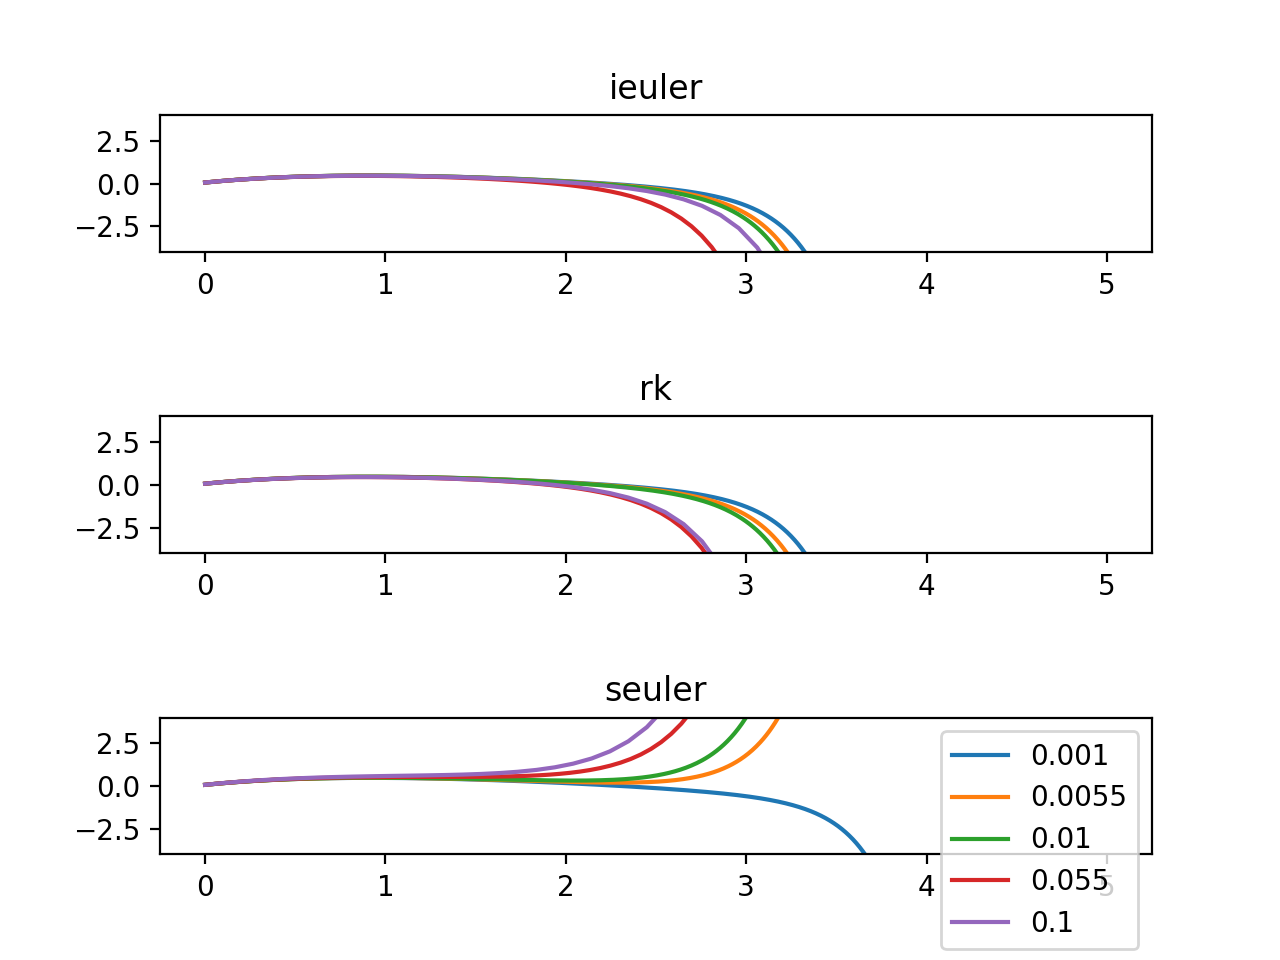

In [25]:
#first import the necessary packages
import matplotlib.pyplot as plt
%matplotlib notebook

#open up the ode.hdf5 file that we just created, this time in 'r' mode
f = h5py.File('ode.hdf5', 'r')

#have a look at the structure of the hdf5 file first
keys = list(f.keys())
print(keys)

#make three subplots, one for each method
fig, axs = plt.subplots(3,1)

#the enumerate function is a built-in Python function
#it just returns the index and value of each element in a list or array
#here we loop over every method, which is the highest level in our HDF5 file
for i, key in enumerate(keys):
    grp = f[key]
    
    #now we get a list of everything in the group we just accessed
    stepKeys = list(grp.keys())
    
    #now we iterate over all of these subgroups, accessing the two datasets in each subgroup we created
    for step in stepKeys:
        
        times = grp[step+'/t']
        solution = grp[step+'/x']
        
        #plot these datasets against each other, labelling with the size of the step
        axs[i].plot(times, solution, label=step)
    
    #just making our plot look nicer now
    axs[i].set_title(key)
    axs[i].set_ylim([-4,4])
    
plt.legend()
plt.subplots_adjust(hspace=1.2)

f.close()

plt.show()

### Quick Comment

Nicely, we see how for each method, decreasing the step size improves the solution. We also see how poor the simple Euler method is at larger step sizes. Only for the smallest step size does the solution look qualitatively like the other two methods. 

## Explanation of Tutorial and Practice Question

The main idea behind the layout of the tutorial was to structure it so that it followed the workflow of a computational mathematics researcher. 

The first two sections of the tutorial covered reading and writing to a text file. Although this is important to learn, it is not used in research as heavily as structured files such as HDF5 or JSON. As a result, these two sections were to familiarise the student with the concepts of being able to use files as a way of saving data. In particular, to become comfortable with the different modes of opening files, like `'r'`, `'w'` or `'a'`. This section also tried to allow the students to make a habit of closing files after they are finished using the file. 2 short exercise problems were included in this section, one for reading files and one for writing to files. The second one encouraged the student to examine the [documentation](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files) as it is important to become good at looking for Python methods to simplify problems. 

The third section dealt with the structure of HDF5 files and the h5py wrapper for this data format. This section was structured in a way resembling the workflow of a computational mathematics researcher. From creating a file to store results they generate, to creating and organising data sets within groups, to attaching meta data to each data set, the tutorial built up a nicely organised data set. 

The exercise problem tried to simulate a researcher working through a problem. The first problem reinforced the first two sections of the tutorial, as it dealt with reading and writing to a text file. The last two problems asked the student to take a research problem and to devise their own way of structuring the data in a HDF5 file. The idea behind this exercise was for the students to feel confident in this (presumably) very new data format so that they would use it in the future. It is also important to devise a structure for a file before you create it as otherwise it can get very messy. The second exercise was structured in a way that forced the students to do this. Finally, the last exercise resembled the final stages of a research problem, which is very often plotting the data. Thus, the last exercise showed how easy it is to integrate matplotlib with HDF5 files and to exploit the hierarchial structure of HDF5 files.

### References

Python Documentation - https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files

HDF5 group website - https://www.hdfgroup.org/solutions/hdf5/

<a id='imageref'></a>Image of HDF5 structure - https://www.neonscience.org/sites/default/files/images/HDF5/hdf5_structure4.jpg

h5py Documentation - https://docs.h5py.org/en/latest/index.html